In [183]:
#ESQUEMA#

#    1) Datos y primeras representaciones
#    2) Modelo predictivo de regresión lineal
#       Clasificación y predicción por continentes
#       Errores regresión lineal
#    3) Preparación del archivo de Tableau  
#    4) URRS-Yugoslavia-Checoslovaquia
#    5) Gráfica y predicción de un país
#    6) Red neuronal (LSTM)
#    7) Red neuronal (Regresión lineal)

# Datos y primeras representaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jorgebalboa1998/TFE/main/tfe.csv')
df.tail(10)

,World,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wake Island,Western Sahara,Yemen,Zambia,Zimbabwe
27,87194.409354,9.100411,27.836629,275.951419,4.140000,67.463392,1.573753,4.503671,627.348883,9.086575,...,46.136437,93.025803,0.945287,656.579497,286.503863,9.300,1.702192,150.032662,10.617536,13.532685
28,86698.560948,20.815574,27.383953,313.816610,4.140000,82.756620,0.067331,4.594891,684.769872,9.671639,...,62.573773,89.667327,0.928663,727.066694,296.671885,9.300,1.697541,156.195815,12.228281,11.553852
29,85833.797025,36.253205,26.725170,349.162159,4.140000,98.669408,0.086741,4.823364,658.006570,8.489397,...,64.101951,92.651440,1.078662,746.184986,320.279792,9.300,1.702192,165.800780,12.682372,11.447041
30,88699.937685,42.760904,25.951812,347.413816,4.140000,106.954693,0.086741,4.656384,718.401028,9.033068,...,53.801445,82.235177,1.093470,774.710904,339.387494,9.076,1.702192,148.813142,13.326287,12.743562
31,89381.682041,55.817534,25.735347,349.578959,2.345646,111.974781,0.086741,4.644186,711.101206,8.519096,...,60.386333,75.791147,1.262149,725.837218,367.499522,9.300,1.702192,127.295632,15.795933,23.221616
32,93532.747868,27.677745,28.131482,415.605973,2.345646,158.867808,0.086741,4.879288,763.690278,7.779918,...,52.047493,59.544793,1.154914,779.649148,378.811037,9.300,1.702192,154.000000,22.255918,26.633205
33,95262.403319,34.914945,26.061698,431.267616,2.345645,156.746603,0.086739,4.974929,793.612833,8.222465,...,53.127068,86.000000,1.073166,682.023883,415.000000,9.300,1.702190,73.260712,23.684890,28.062465
34,96793.560792,25.590861,27.170328,420.723770,2.345646,150.613945,0.086738,5.052921,776.904164,6.843248,...,53.152082,90.000000,1.097132,709.000000,445.000000,9.300,1.697537,62.270179,23.509630,25.655846
35,98942.401009,23.631189,35.325689,407.385096,2.345646,134.828055,0.084658,4.799068,750.748932,8.202986,...,47.297479,91.000000,1.183095,644.000000,459.254466,9.300,1.653425,59.000000,26.039699,24.117178
36,100051.024180,22.452833,33.052137,418.170197,2.343846,133.345507,0.084658,4.929425,718.787315,8.063644,...,49.822603,95.000000,1.538525,582.000000,477.793644,9.300,1.653425,57.000000,29.028055,29.848164


In [3]:
years = np.linspace(1980,2016,37)

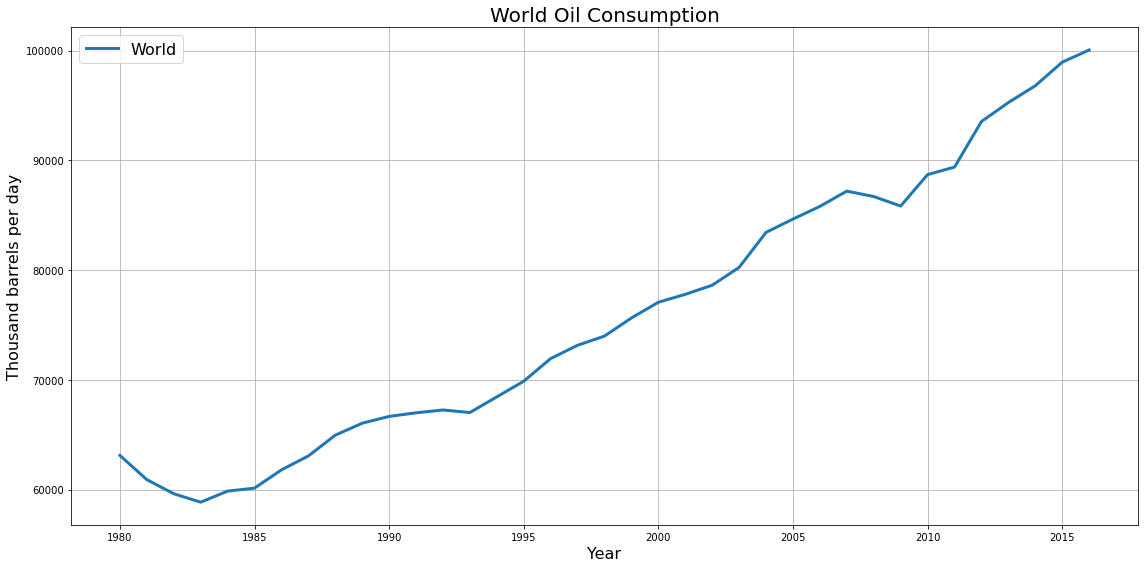

In [4]:
plt.figure(figsize=(16,8))

world = df['World']
plt.plot(years, world, label='World', linewidth='3')

plt.title('World Oil Consumption', fontsize=20)
plt.ylabel('Thousand barrels per day', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.legend(loc='upper left', fontsize='16')

plt.grid(True)

plt.tight_layout()

plt.show()

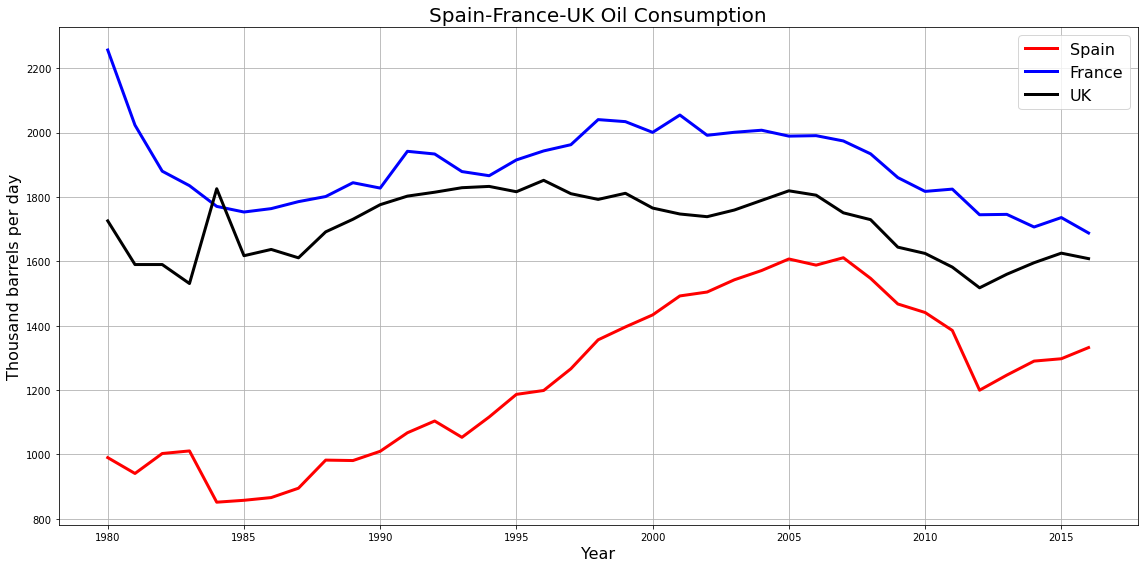

In [5]:
plt.figure(figsize=(16,8))

plt.plot(years, df['Spain'], label='Spain', linewidth='3', color='red')
plt.plot(years, df['France'], label='France', linewidth='3', color='blue')
plt.plot(years, df['United Kingdom'], label='UK', linewidth='3', color='black')

plt.title('Spain-France-UK Oil Consumption', fontsize=20)
plt.ylabel('Thousand barrels per day', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.legend(loc='best', fontsize='16')

plt.grid(True)

plt.tight_layout()

plt.show()

# Modelo predictivo de Regresión Lineal

In [6]:
from sklearn import linear_model

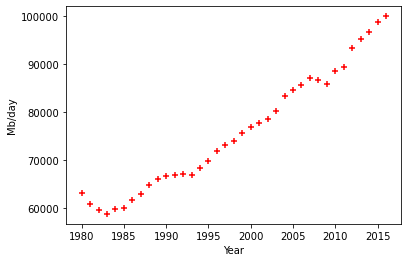

In [8]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Mb/day')
plt.scatter(years, df.World, color='red', marker='+')
plt.show()

In [9]:
#Modelo
lr = linear_model.LinearRegression()
lr.fit(years.reshape(-1, 1), df.World)

LinearRegression()

In [10]:
#Predicción para un año cualquiera
lr.predict([[2018]])

array([98697.96721391])

In [11]:
#Coeficientes
lr.coef_, lr.intercept_

(array([1138.60508585]), -2199007.0960323396)

In [13]:
#Años que se quieren predecir
years_new = np.linspace(1980, 2021, 42)
years_new

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021.])

In [14]:
pred = []
for _ in years_new:
    pred.append(lr.predict([[_]]))

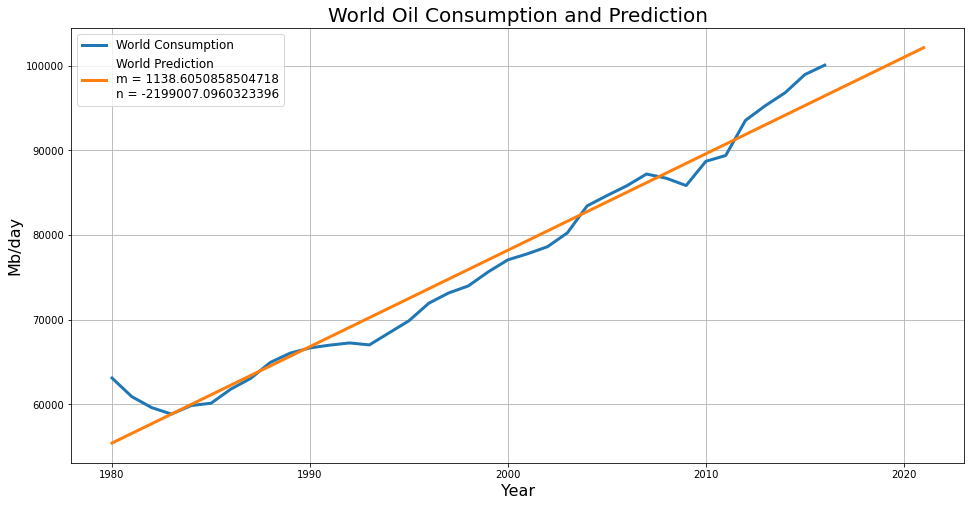

In [15]:
plt.figure(figsize=(16,8))

plt.title('World Oil Consumption and Prediction', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mb/day', fontsize=16)

plt.plot(years, df.World, label = 'World Consumption', linewidth='3')
plt.plot(years_new, pred, linewidth='3', label = 'World Prediction \nm = {}\nn = {}'.format(lr.coef_[0], lr.intercept_))

plt.grid(True)

plt.legend(fontsize=12)

plt.show()

In [16]:
#Error relativo de la predicción

world_err = []
for _ in range(len(world)):
    world_err.append(100 * abs(pred[_] - world[_]) / world[_])
    
np.mean(world_err)

2.298192863544121

# Clasificación y predicción por continentes

In [17]:
df = df.rename(columns = {'Germany, East': 'East Germany', 'Germany, West': 'West Germany', 'Gambia, The': 'Gambia'})

In [18]:
europe = ['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
         'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Falkland Islands', 'Faroe Islands', 'Finland',
         'Former Czechoslovakia', 'Former Serbia and Montenegro', 'Former U.S.S.R.', 'Former Yugoslavia', 'France',
         'Georgia', 'Germany', 'East Germany', 'West Germany', 'Gibraltar', 'Greece', 'Greenland', 'Hungary', 'Iceland', 
         'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 
         'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 
         'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']

asia = ['Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China', 'Hong Kong', 'India', 
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 
       'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territories', 
       'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 
       'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 
         'Central African Republic', 'Chad', 'Comoros', 'Congo-Brazzaville', 'Congo-Kinshasa', 'Côte d’Ivoire', 
         'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
         'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 
         'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Reunion', 'Rwanda', 'Saint Helena', 
         'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 
         'Sudan', 'Tanzania', 'Togo', 'Tonga', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']

north_america = ['Antigua and Barbuda', 'Aruba', 'Barbados', 'Belize', 'Bermuda', 'British Virgin Islands', 'Canada', 
                 'Cayman Islands', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada',
                'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Montserrat', 
                'Netherlands Antilles', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 
                'Saint Pierre and Miquelon', 'Saint Vincent/Grenadines', 'The Bahamas', 'Turks and Caicos Islands', 
                'U.S. Virgin Islands', 'United States']

south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'French Guiana', 'Guyana', 'Paraguay', 
                'Peru', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela']

australia = ['American Samoa', 'Australia', 'Cook Islands', 'Fiji', 'French Polynesia', 'Guam', 'Kiribati', 'Micronesia', 
            'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Timor-Leste', 
            'U.S. Pacific Islands', 'Vanuatu', 'Wake Island']

In [19]:
paises = df.columns.drop('World')

In [20]:
europe_df = pd.DataFrame()
asia_df = pd.DataFrame()
africa_df = pd.DataFrame()
nam_df = pd.DataFrame()
sam_df = pd.DataFrame()
aus_df = pd.DataFrame()

In [21]:
for _ in europe:
    europe_df[_] = df[_]
for _ in asia:
    asia_df[_] = df[_]
for _ in africa:
    africa_df[_] = df[_]
for _ in north_america:
    nam_df[_] = df[_]
for _ in south_america:
    sam_df[_] = df[_]
for _ in australia:
    aus_df[_] = df[_]  

In [22]:
europe_sum = europe_df.sum(axis = 1)
asia_sum = asia_df.sum(axis = 1)
africa_sum = africa_df.sum(axis = 1)
nam_sum = nam_df.sum(axis = 1)
sam_sum = sam_df.sum(axis = 1)
aus_sum = aus_df.sum(axis = 1)

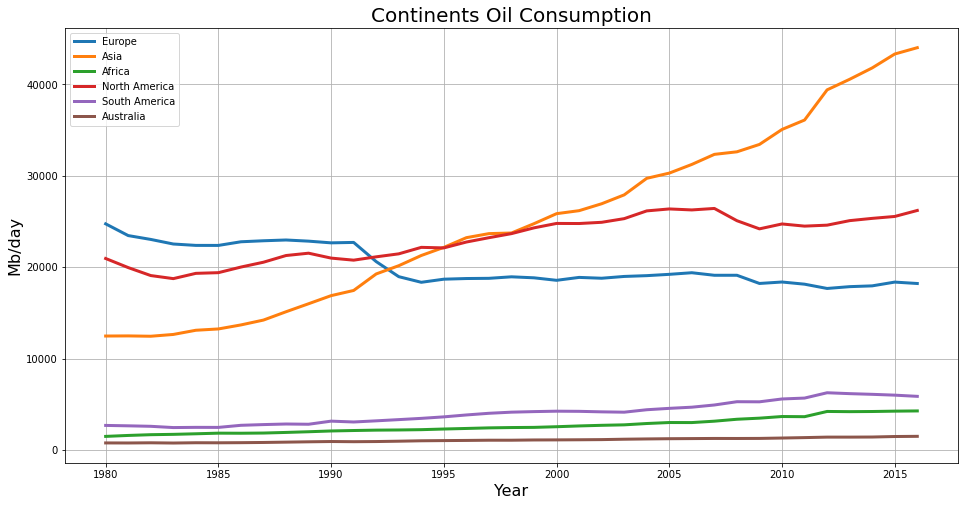

In [23]:
plt.figure(figsize=(16,8))

plt.title('Continents Oil Consumption', fontsize=20)
plt.ylabel('Mb/day', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.plot(years, europe_sum, label='Europe', linewidth = '3')
plt.plot(years, asia_sum, label='Asia', linewidth = '3')
plt.plot(years, africa_sum, label='Africa', linewidth = '3')
plt.plot(years, nam_sum, label='North America', linewidth = '3')
plt.plot(years, sam_sum, label='South America', linewidth = '3')
plt.plot(years, aus_sum, label='Australia', linewidth = '3')

plt.grid(True)

plt.legend()

plt.show()

In [24]:
#Ajuste del modelo a cada continente

lr.fit(years.reshape(-1, 1), europe_sum)
europe_pred = []
for _ in years_new:
    europe_pred.append(lr.predict([[_]]))
    
lr.fit(years.reshape(-1, 1), asia_sum)
asia_pred = []
for _ in years_new:
    asia_pred.append(lr.predict([[_]]))    
    
lr.fit(years.reshape(-1, 1), africa_sum)
africa_pred = []
for _ in years_new:
    africa_pred.append(lr.predict([[_]]))   

lr.fit(years.reshape(-1, 1), nam_sum)
nam_pred = []
for _ in years_new:
    nam_pred.append(lr.predict([[_]]))    
    
lr.fit(years.reshape(-1, 1), sam_sum)
sam_pred = []
for _ in years_new:
    sam_pred.append(lr.predict([[_]]))   
    
lr.fit(years.reshape(-1, 1), aus_sum)
aus_pred = []
for _ in years_new:
    aus_pred.append(lr.predict([[_]])) 

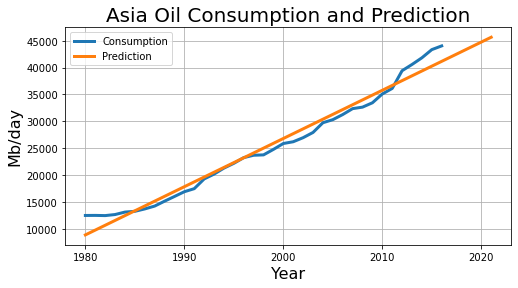

In [25]:
#Representación para un continente (Asia)

plt.figure(figsize=(8,4))

plt.title('Asia Oil Consumption and Prediction', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mb/day', fontsize=16)

plt.plot(years, asia_sum, label = 'Consumption', linewidth='3')
plt.plot(years_new, asia_pred, label = 'Prediction', linewidth='3')

plt.grid(True)

plt.legend()

plt.show()

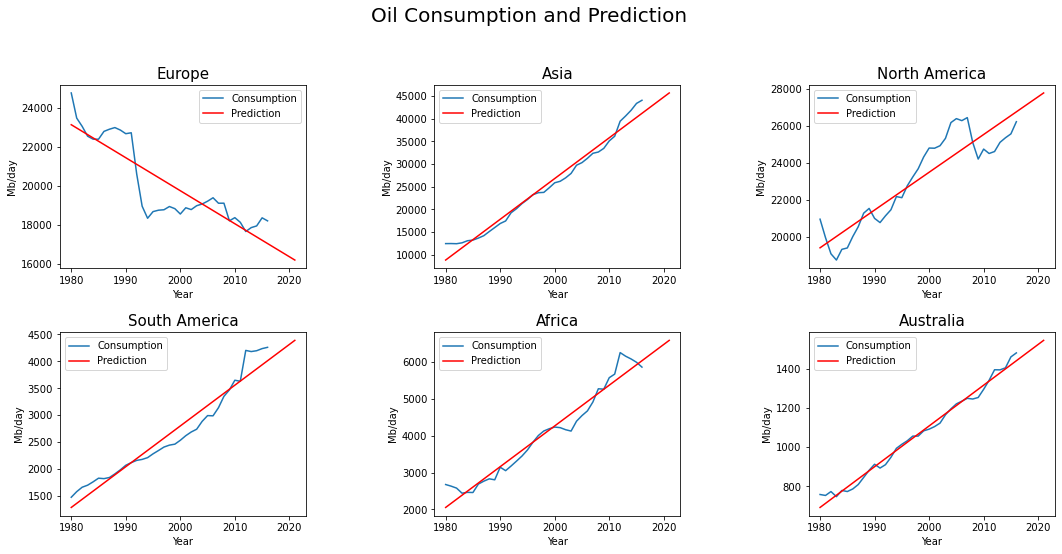

In [26]:
#Todas las predicciones

fig, axs = plt.subplots(2, 3)
fig.suptitle('Oil Consumption and Prediction', fontsize=20)

plt.tight_layout()

axs[0, 0].set_title('Europe', fontsize=15)
axs[0, 0].plot(years, europe_sum, label='Consumption')
axs[0, 0].plot(years_new, europe_pred, label='Prediction', color='red')

axs[0, 1].set_title('Asia', fontsize=15)
axs[0, 1].plot(years, asia_sum, label='Consumption')
axs[0, 1].plot(years_new, asia_pred, label='Prediction', color='red')

axs[0, 2].set_title('North America', fontsize=15)
axs[0, 2].plot(years, nam_sum, label='Consumption')
axs[0, 2].plot(years_new, nam_pred, label='Prediction', color='red')

axs[1, 0].set_title('South America', fontsize=15)
axs[1, 0].plot(years, africa_sum, label='Consumption')
axs[1, 0].plot(years_new, africa_pred, label='Prediction', color='red')

axs[1, 1].set_title('Africa', fontsize=15)
axs[1, 1].plot(years, sam_sum, label='Consumption')
axs[1, 1].plot(years_new, sam_pred, label='Prediction', color='red')

axs[1, 2].set_title('Australia', fontsize=15)
axs[1, 2].plot(years, aus_sum, label='Consumption')
axs[1, 2].plot(years_new, aus_pred, label='Prediction', color='red')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Mb/day')
    ax.legend(loc='best')
    
fig.set_figheight(8)
fig.set_figwidth(16)
    
plt.show()

### ERRORES REGRESIÓN LINEAL

In [28]:
europe_pred1d = np.concatenate(europe_pred, axis=0)
asia_pred1d = np.concatenate(asia_pred, axis=0)
nam_pred1d = np.concatenate(nam_pred, axis=0)
sam_pred1d = np.concatenate(sam_pred, axis=0)
africa_pred1d = np.concatenate(africa_pred, axis=0)
aus_pred1d = np.concatenate(aus_pred, axis=0)

In [29]:
pred1d = [europe_pred1d, asia_pred1d, nam_pred1d, sam_pred1d, africa_pred1d, aus_pred1d]
suma = [europe_sum, asia_sum, nam_sum, sam_sum, africa_sum, aus_sum]

In [30]:
continents = np.transpose(['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Australia'])

In [31]:
#Media del error relativo (para cada continente)

print('List of errors per continent \n')
for _ in range(0,6):
    print(continents[_], end="") 
    print(':', 100 * np.mean( abs( pred1d[_][0:37] - suma[_] ) / suma[_] ), end="")  
    print('%')

List of errors per continent 

Europe: 4.119095042628299%
Asia: 5.526900709991953%
North America: 3.6934569346212176%
South America: 5.1364195470546585%
Africa: 6.645615776949368%
Australia: 1.9673962725306224%


# Preparación del archivo de Tableau

In [32]:
years_rep = pd.DataFrame(years.repeat(230))
years_rep.shape

(8510, 1)

In [33]:
df = df.drop(['World'], axis=1)

In [34]:
paises_rep = pd.concat([pd.DataFrame(df.columns)]*37, ignore_index=True)
paises_rep.shape

(8510, 1)

In [35]:
df_trans = np.transpose(df)
mbday = []
for i in range(0,37):
    for j in range(0,230):
        mbday.append(np.array(df_trans)[j, i])
mbday = pd.DataFrame(mbday)
mbday.shape

(8510, 1)

In [36]:
continents = []
for _ in np.array(paises_rep):
    if _ in europe:
        continents.append('Europe')
    elif _ in asia:
        continents.append('Asia')
    elif _ in north_america:
        continents.append('North America')
    elif _ in africa:
        continents.append('Africa')
    elif _ in south_america:
        continents.append('South America')
    elif _ in australia: 
        continents.append('Australia')
    else:
        continents.append('Antarctica')
    
continents = pd.DataFrame(continents)
continents.shape

(8510, 1)

In [37]:
new_df = pd.concat([mbday, paises_rep, continents, years_rep], axis=1)
new_df.columns = ['Mb/day', 'Country', 'Continent', 'Year']
new_df.fillna(0)
new_df

,Mb/day,Country,Continent,Year
0,7.000000,Afghanistan,Asia,1980.0
1,46.000000,Albania,Europe,1980.0
2,121.000000,Algeria,Africa,1980.0
3,2.800000,American Samoa,Australia,1980.0
4,20.000000,Angola,Africa,1980.0
...,...,...,...,...
8505,9.300000,Wake Island,Australia,2016.0
8506,1.653425,Western Sahara,Africa,2016.0
8507,57.000000,Yemen,Asia,2016.0
8508,29.028055,Zambia,Africa,2016.0


In [38]:
new_df.dropna(subset = ["Mb/day"], inplace=True)
new_df.isna().sum()

Mb/day       0
Country      0
Continent    0
Year         0
dtype: int64

In [ ]:
new_df.to_csv('tableau.csv', header=True, index=None, sep=',', mode='a')

# Predicción USSR-Yugoslavia-Checoslovaquia

## USSR

In [39]:
ussr = df['Former U.S.S.R.']

paises_ussr = ['Russia', 'Ukraine', 'Belarus', 'Azerbaijan', 'Georgia', 'Turkmenistan', 'Uzbekistan', 'Tajikistan', 
              'Armenia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Estonia']

paises_ussr_df = pd.DataFrame()
for _ in paises_ussr:
    paises_ussr_df[_] = df[_]
    
paises_ussr_df_sum = paises_ussr_df.sum(axis=1)

In [40]:
lr.fit(years.reshape(-1, 1)[0:12], ussr[0:12])
ussr_pred = []
for _ in years_new:
    ussr_pred.append(lr.predict([[_]]))

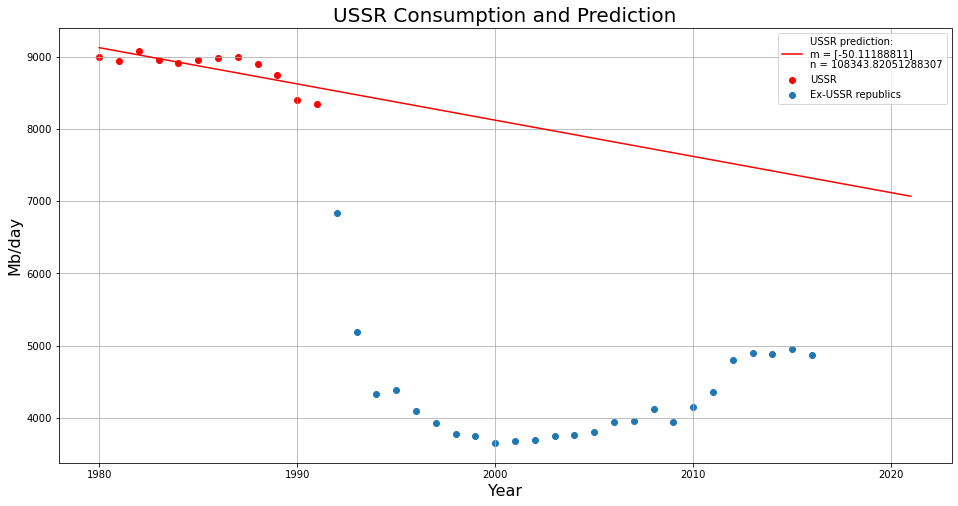

In [41]:
plt.figure(figsize=(16,8))
plt.title('USSR Consumption and Prediction', fontsize=20)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mb/day', fontsize=16)

plt.plot(years_new, ussr_pred, color='red', label='USSR prediction: \nm = {} \nn = {}'.format(lr.coef_, lr.intercept_))
plt.scatter(years[0:12], ussr[0:12], color='red', label='USSR')
plt.scatter(years[12:len(ussr)], paises_ussr_df_sum[12:len(ussr)], label='Ex-USSR republics')

plt.legend(loc='best')
plt.tight_layout
plt.grid(True)

plt.show()

In [42]:
print(lr.coef_)
print(lr.intercept_)

[-50.11188811]
108343.82051288307


## YUGOSLAVIA

In [43]:
yugoslavia = df['Former Yugoslavia']

paises_yugoslavia = ['Serbia', 'Croatia', 'Slovenia', 'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia', 'Kosovo', 
                    'Former Serbia and Montenegro']

paises_yugoslavia_df = pd.DataFrame()
for _ in paises_yugoslavia:
    paises_yugoslavia_df[_] = df[_]
    
paises_yugoslavia_df_sum = paises_yugoslavia_df.sum(axis=1)

In [44]:
lr.fit(years.reshape(-1, 1)[0:12], yugoslavia[0:12])
yugoslavia_pred = []
for _ in years_new:
    yugoslavia_pred.append(lr.predict([[_]]))

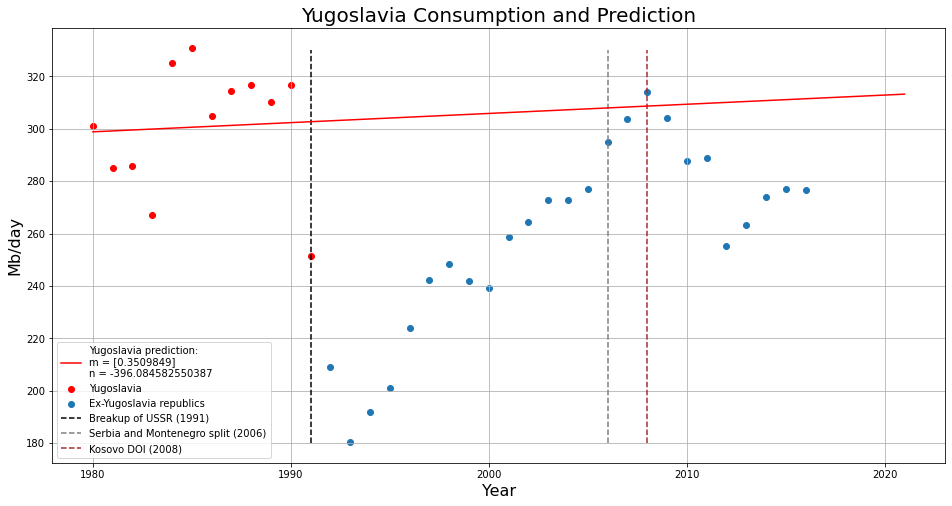

In [45]:
plt.figure(figsize=(16,8))
plt.title('Yugoslavia Consumption and Prediction', fontsize=20)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mb/day', fontsize=16)

plt.plot(years_new, yugoslavia_pred, color='red', label='Yugoslavia prediction: \nm = {} \nn = {}'
         .format(lr.coef_, lr.intercept_))
plt.scatter(years[0:12], yugoslavia[0:12], color='red', label='Yugoslavia')
plt.scatter(years[12:len(yugoslavia)], paises_yugoslavia_df_sum[12:len(ussr)], label='Ex-Yugoslavia republics')

plt.vlines(x=1991, ymin=180, ymax=330, color='Black', ls='--', lw=1.5, label='Breakup of USSR (1991)')
plt.vlines(x=2006, ymin=180, ymax=330, color='Grey', ls='--', lw=1.5, label='Serbia and Montenegro split (2006)')
plt.vlines(x=2008, ymin=180, ymax=330, color='Brown', ls='--', lw=1.5, label='Kosovo DOI (2008)')

plt.legend()
plt.tight_layout
plt.grid(True)

plt.show()

In [46]:
print(lr.coef_)
print(lr.intercept_)

[0.3509849]
-396.084582550387


## CZECHOSLOVAKIA

In [47]:
czechoslovakia = df['Former Czechoslovakia']

paises_czechoslovakia = ['Czech Republic', 'Slovakia']

paises_czechoslovakia_df = pd.DataFrame()
for _ in paises_czechoslovakia:
    paises_czechoslovakia_df[_] = df[_]
    
paises_czechoslovakia_df_sum = paises_czechoslovakia_df.sum(axis=1)

In [48]:
lr.fit(years.reshape(-1, 1)[0:13], czechoslovakia[0:13])
czechoslovakia_pred = []
for _ in years_new:
    czechoslovakia_pred.append(lr.predict([[_]]))

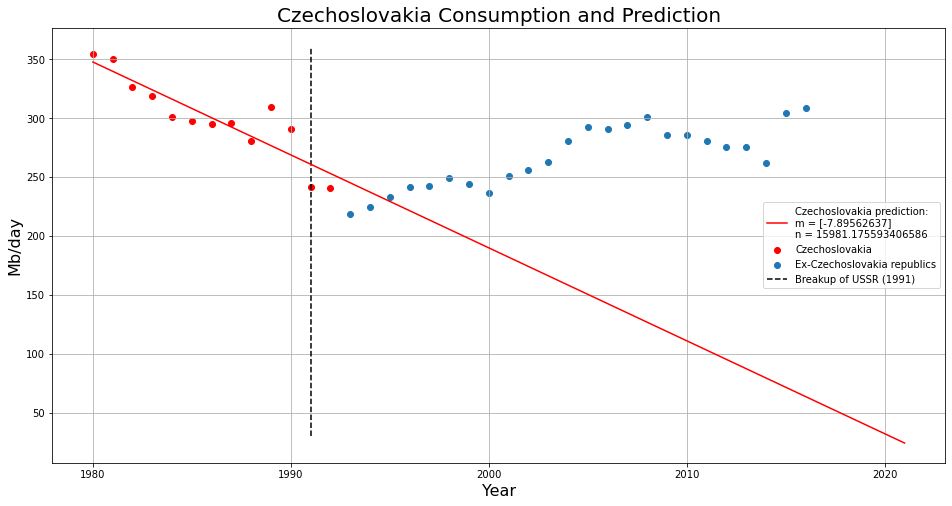

In [49]:
plt.figure(figsize=(16,8))
plt.title('Czechoslovakia Consumption and Prediction', fontsize=20)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Mb/day', fontsize=16)

plt.plot(years_new, czechoslovakia_pred, color='red', label='Czechoslovakia prediction: \nm = {} \nn = {}'
         .format(lr.coef_, lr.intercept_))
plt.scatter(years[0:13], czechoslovakia[0:13], color='red', label='Czechoslovakia')
plt.scatter(years[13:len(czechoslovakia)], paises_czechoslovakia_df_sum[13:len(czechoslovakia)], 
            label='Ex-Czechoslovakia republics')

plt.vlines(x=1991, ymin=30, ymax=360, color='Black', ls='--', lw=1.5, label='Breakup of USSR (1991)')

plt.legend(loc='center right')
plt.tight_layout
plt.grid(True)

plt.show()

In [50]:
print(lr.coef_)
print(lr.intercept_)

[-7.89562637]
15981.175593406586


# Gráfica y predicción de un país

In [152]:
print('Type a country: ')
pais = input()

Type a country: 


 Thailand


In [153]:
lr.fit(pd.DataFrame(years), df[pais])
pais_pred = []
for _ in years_new:
    pais_pred.append(lr.predict([[_]]))

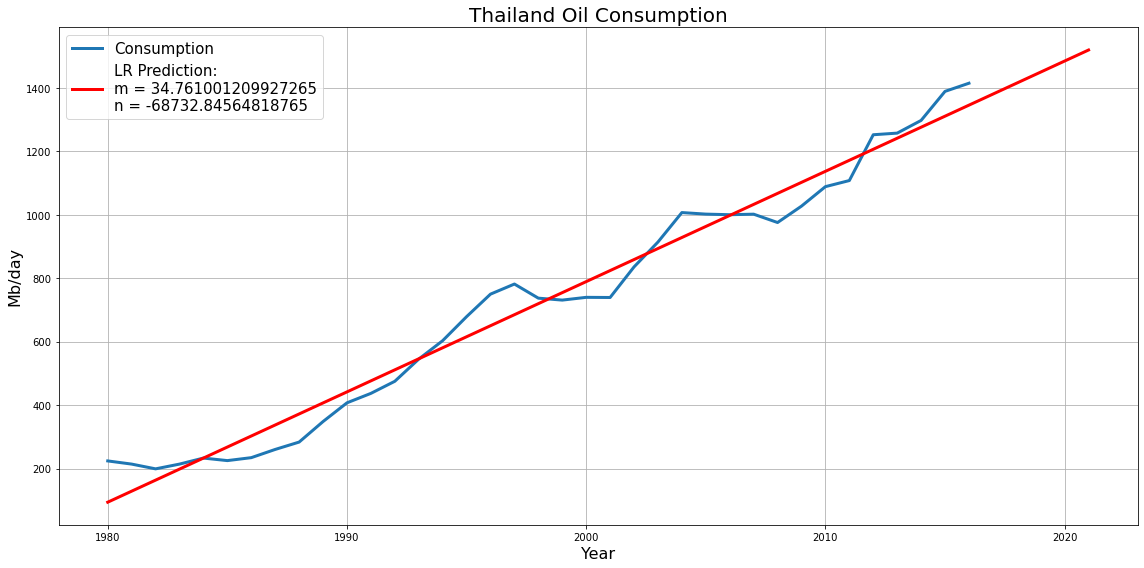

In [154]:
plt.figure(figsize=(16,8))

plt.title('{} Oil Consumption'.format(pais), fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mb/day', fontsize=16)

plt.plot(years, df[pais], linewidth=3, label='Consumption')
plt.plot(years_new, pais_pred, color='red', linewidth=3, label='LR Prediction: \nm = {}\nn = {}'
         .format(lr.coef_[0], lr.intercept_))

plt.grid(True)
plt.tight_layout()
plt.legend(loc='best', prop={'size': 15})

plt.show()

# Red neuronal (LSTM)

In [54]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [55]:
spain = df.filter(['Spain'])

spain = spain.values 
europe_nn = europe_sum.values
asia_nn = asia_sum.values
nam_nn = nam_sum.values
sam_nn = sam_sum.values
africa_nn = africa_sum.values
aus_nn = aus_sum.values


training_len = math.ceil( len(europe_nn) * 0.80 )
training_len

30

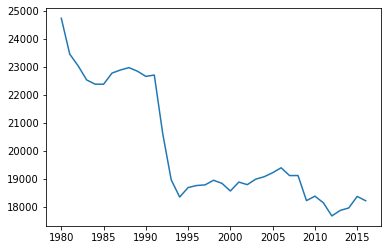

In [56]:
plt.plot(years, europe_nn)
plt.show()

In [57]:
#ESCALADO
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(europe_nn.reshape(-1,1))

In [58]:
#DATOS DE ENTRENAMIENTO
train_data = scaled_data[0:training_len , :]

x_train = []
y_train = []

for i in range(29, len(train_data)):
    x_train.append(train_data[i-29:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 29:
        print(x_train)
        print(y_train)
        print()

[array([1.        , 0.81839606, 0.75888415, 0.68793633, 0.66654464,
       0.66610167, 0.72257527, 0.7382157 , 0.75012209, 0.73221305,
       0.70589471, 0.71259457, 0.41568452, 0.182599  , 0.09547401,
       0.14357023, 0.15376979, 0.15690296, 0.18031333, 0.1647926 ,
       0.12611024, 0.17113371, 0.15817633, 0.18601376, 0.19832327,
       0.21859748, 0.24348751, 0.20402423, 0.20427453])]
[0.07737256205928444]



In [59]:
#MATRICES DE NUMPY
x_train, y_train = np.array(x_train), np.array(y_train)

In [60]:
#RESHAPE
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1, 29, 1)

In [61]:
#MODELO LSTM
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

In [62]:
#COMPILACIÓN MODELO
model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
#ENTRENAR EL MODELO
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.0036
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 2.5388e-04
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 1.8753e-05
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 4.1084e-04
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 8.2056e-04
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 8.9332e-04
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 6.9027e-04
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 3.9411e-04
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 1.4780e-04
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 1.8598e-05
Epoch 12/100
1/1 [==============================] - 0s 30ms/step - loss: 8.1706e-06
Epoch 13/10

In [64]:
#DATOS DE TEST
test_data = scaled_data[training_len - 29: , :]

x_test = []
y_test = europe_nn[training_len:, ]

for i in range(29, len(test_data)):
    x_test.append(test_data[i-29:i, 0])

In [65]:
#MATRICES DE NUMPY
x_test = np.array(x_test)

In [66]:
#RESHAPE
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [67]:
#PREDICCIÓN
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [68]:
#ROOT MEAN SQUARED ERROR (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

68.19106067223245

In [69]:
predictions

array([[18206.447],
       [18192.623],
       [18175.37 ],
       [18152.576],
       [18129.705],
       [18109.03 ],
       [18094.904]], dtype=float32)

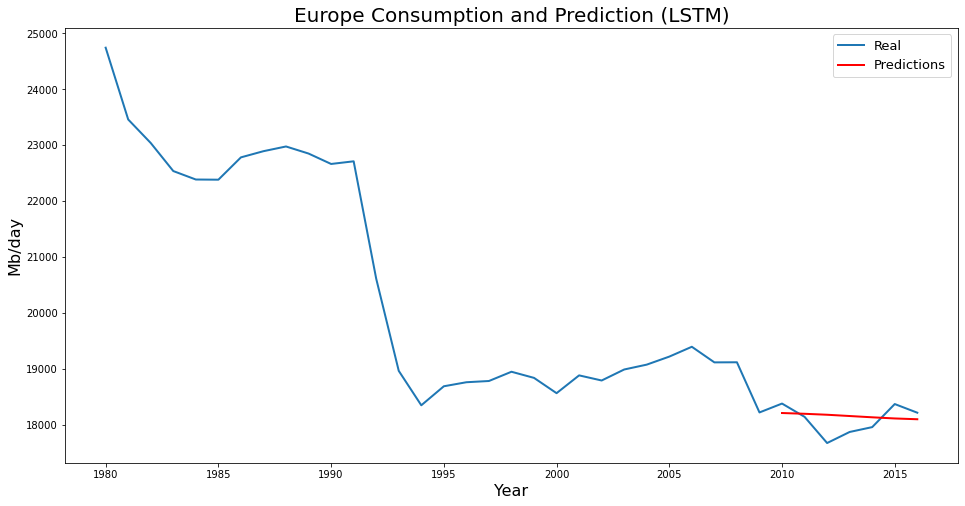

In [70]:
plt.figure(figsize=(16,8))

plt.title('Europe Consumption and Prediction (LSTM)', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Mb/day', fontsize = 16)

plt.plot(years, europe_nn, linewidth = '2')
plt.plot(years[30:37], predictions, color = 'red', linewidth = '2')

plt.legend(['Real', 'Predictions'], loc = 'best', fontsize=13)

plt.show()

### Media del error relativo de las predicciones

In [71]:
europe_nn_select = europe_nn[len(europe_nn)-7: len(europe_nn)]
europe_nn_select

array([18375.55113786, 18138.10153981, 17669.27157298, 17867.36733932,
       17954.077851  , 18366.85481659, 18212.09261461])

In [75]:
error_europe_nn = np.mean(100 * abs( europe_nn_select.reshape(-1, 1) - predictions) / europe_nn_select.reshape(-1, 1))
print(error_europe_nn, end='')
print('%')

1.243830582154213%


# Red neuronal (Regresión lineal)

In [76]:
import pathlib

import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [77]:
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
le_continent = LabelEncoder()

new_df['Country_n'] = le_country.fit_transform(new_df['Country'])  
new_df['Continent_n'] = le_continent.fit_transform(new_df['Continent'])

new_df_n = new_df.drop(['Country', 'Continent'], axis = 'columns')
new_df_n

,Mb/day,Year,Country_n,Continent_n
0,7.000000,1980.0,0,2
1,46.000000,1980.0,1,4
2,121.000000,1980.0,2,0
3,2.800000,1980.0,3,3
4,20.000000,1980.0,4,0
...,...,...,...,...
8505,9.300000,2016.0,222,3
8506,1.653425,2016.0,224,0
8507,57.000000,2016.0,225,2
8508,29.028055,2016.0,226,0


In [78]:
#Particiones

train_dataset = new_df_n.sample(frac = 0.8, random_state=0)
test_dataset = new_df_n.drop(train_dataset.index)

In [79]:
train_stats = train_dataset.describe()
train_stats.pop("Mb/day")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Year,6672.0,1998.001199,10.708481,1980.0,1989.0,1998.0,2007.0,2016.0
Country_n,6672.0,112.880246,65.767513,0.0,56.0,112.0,170.0,227.0
Continent_n,6672.0,2.721823,1.962461,0.0,0.0,3.0,4.0,6.0


In [80]:
train_labels = train_dataset.pop('Mb/day')
test_labels = test_dataset.pop('Mb/day')

In [81]:
#Normalización

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [82]:
#Modelo

def build_model():
    model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [83]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________


In [84]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.16996369],
       [ 0.07119281],
       [ 0.24141915],
       [-0.31930098],
       [-0.00923521],
       [-0.30481726],
       [-0.11235204],
       [ 0.15877336],
       [-0.16273251],
       [-0.20928226]], dtype=float32)

In [85]:
#Entrenamiento del modelo

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [86]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,420107.37500,306.185272,420107.37500,414219.50000,317.785339,414219.50000,995
996,424254.40625,308.909119,424254.40625,404182.78125,297.952423,404182.78125,996
997,420910.68750,307.615295,420910.68750,415556.40625,304.054535,415556.40625,997
998,423476.75000,307.006592,423476.75000,401676.93750,296.707642,401676.93750,998
999,423078.15625,309.735962,423078.15625,401741.75000,308.079407,401741.75000,999


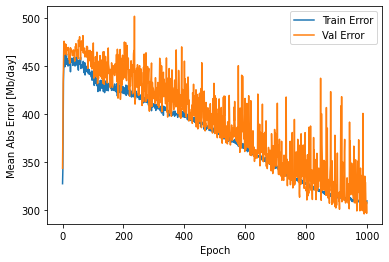

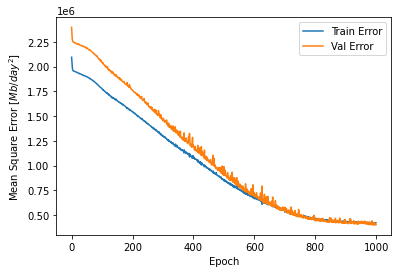

In [87]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Mb/day]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Mb/day^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()


plot_history(history)

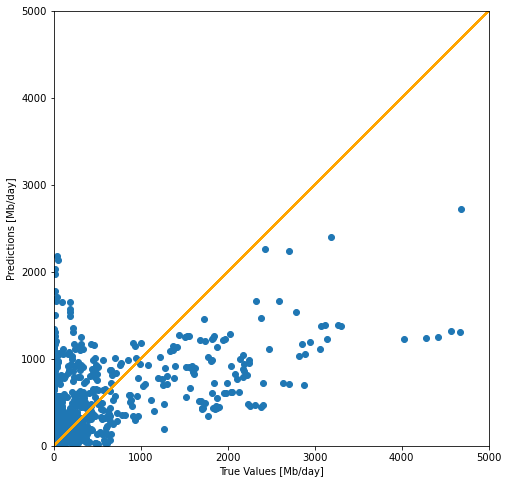

In [95]:
test_predictions = model.predict(normed_test_data).flatten()

plt.figure(figsize=(8,8))

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Mb/day]')
plt.ylabel('Predictions [Mb/day]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,5000])
plt.ylim([0,5000])

plt.plot(test_labels, test_labels, color='orange')

plt.show()

In [90]:
#Error de las predicciones
np.mean(100 * abs(test_labels - test_predictions) / test_labels)

inf